Table of Content

1. Import Required Libraries
2. Load Data
3. Drop Employee id column
4. Data information
5. Data Cleaning
6. Check Outliers
7. EDA
    1. Univariant Analysis
    2. Check Distribution of target variable
    3. Bivariant Analysis
    4. Multivariant Analysis
    5. Coreelation map
8. Encode categorical variables
9. splitting data into train and test
10. Base line models
    1. Logistic Rgression
    2. Ada Boost Classifier
    3. Random Forest Classifier
    4. Stacking Classifier
    5. XGBoost Classifier
    6. KNeighbors Classifier
11. Balancing the data and Building model again
    Balance data using smotetomek
    1. Logistic Rgression
    2. Ada Boost Classifier
    3. Random Forest Classifier
    4. Stacking Classifier
    5. XGBoost Classifier
    6. KNeighbors Classifier
12. Cross validation(On best two models)
13. Feature Selection
14. Hyper parameter tuning
15. Creating submission file
16. Best Model

# Import Required Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import api as sm

# Load Data

In [38]:
train = pd.read_csv('train_LZdllcl.csv')
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [39]:
test = pd.read_csv('test_2umaH9m.csv')
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [40]:
sample_sub = pd.read_csv('sample_submission_M0L0uXE.csv')
sample_sub.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


# Drop Employee id column

In [41]:
train = train.drop('employee_id', axis=1)
test = test.drop('employee_id', axis=1)

In [42]:
train = train.drop('region', axis=1)
test = test.drop('region', axis=1)

# Getting Information about data

Shape of data

In [6]:
print('Train data contains', train.shape[0], 'rows and', train.shape[1], 'columns')
print('Train data contains', test.shape[0], 'rows and', test.shape[1], 'columns')

Train data contains 54808 rows and 13 columns
Train data contains 23490 rows and 12 columns


Data Description

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [9]:
train.describe(include='O').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            54808 non-null  object
 1   education             54808 non-null  object
 2   gender                54808 non-null  object
 3   recruitment_channel   54808 non-null  object
 4   no_of_trainings       54808 non-null  int64 
 5   age                   54808 non-null  int64 
 6   previous_year_rating  54808 non-null  object
 7   length_of_service     54808 non-null  int64 
 8   KPIs_met >80%         54808 non-null  int64 
 9   awards_won?           54808 non-null  int64 
 10  avg_training_score    54808 non-null  int64 
 11  is_promoted           54808 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 5.0+ MB


# Data cleaning

In [10]:
(train.isnull().sum() / len(train)) * 100

department              0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [11]:
(test.isnull().sum() / len(train)) * 100

department              0.000000
education               1.886586
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    3.306087
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [43]:
train['previous_year_rating'] = train['previous_year_rating'].fillna('Fresher')
test['previous_year_rating'] = test['previous_year_rating'].fillna('Fresher')
train['education'] = train['education'].fillna('unknown')
test['education'] = test['education'].fillna('unknown')

# Check Outliers

no_of_trainings
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  3.  3.  3.  4. 10.]


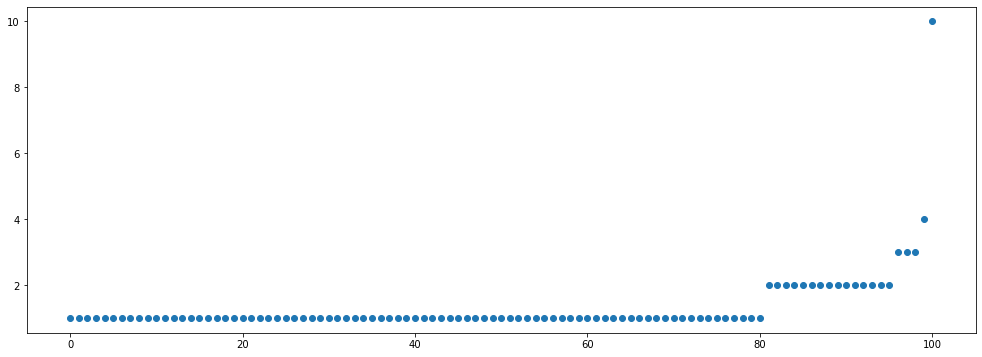

age
[20. 23. 24. 24. 25. 25. 26. 26. 26. 26. 27. 27. 27. 27. 27. 28. 28. 28.
 28. 28. 28. 29. 29. 29. 29. 29. 29. 30. 30. 30. 30. 30. 30. 30. 31. 31.
 31. 31. 31. 31. 32. 32. 32. 32. 32. 32. 33. 33. 33. 33. 33. 33. 34. 34.
 34. 34. 34. 34. 35. 35. 35. 35. 35. 36. 36. 36. 36. 37. 37. 37. 37. 38.
 38. 38. 38. 39. 39. 39. 40. 40. 40. 41. 41. 42. 42. 43. 43. 44. 44. 45.
 46. 46. 47. 48. 50. 51. 52. 54. 56. 58. 60.]


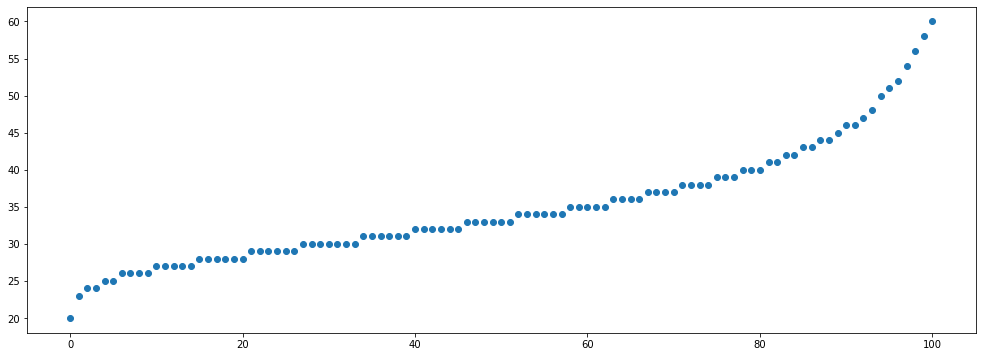

length_of_service
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  6.  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10.
 11. 12. 12. 13. 14. 15. 16. 17. 18. 20. 37.]


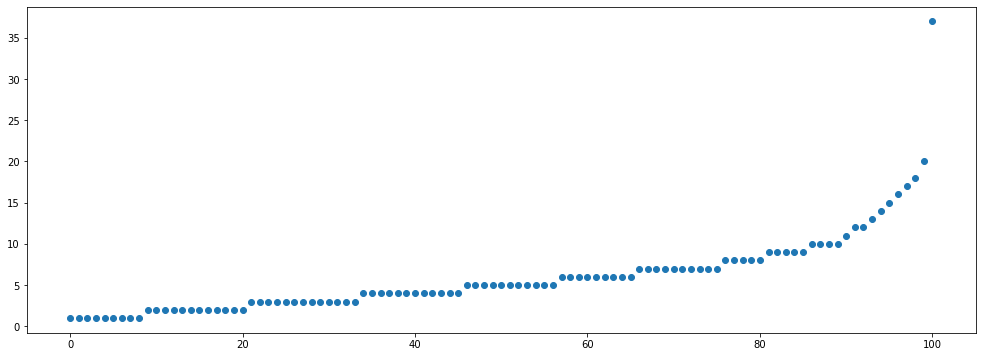

KPIs_met >80%
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


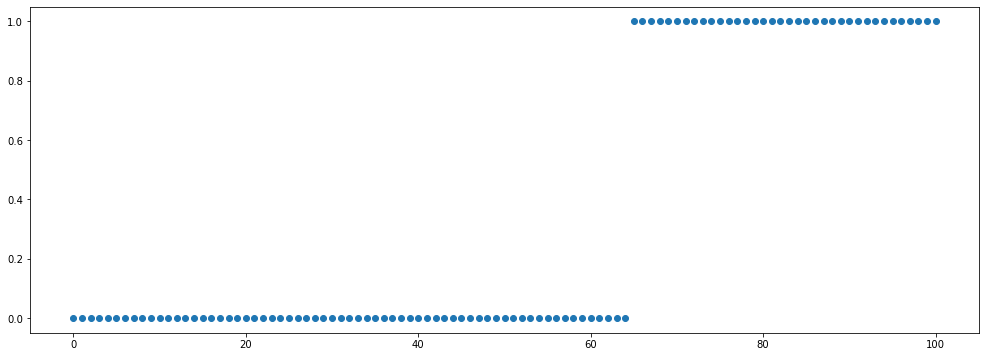

awards_won?
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1.]


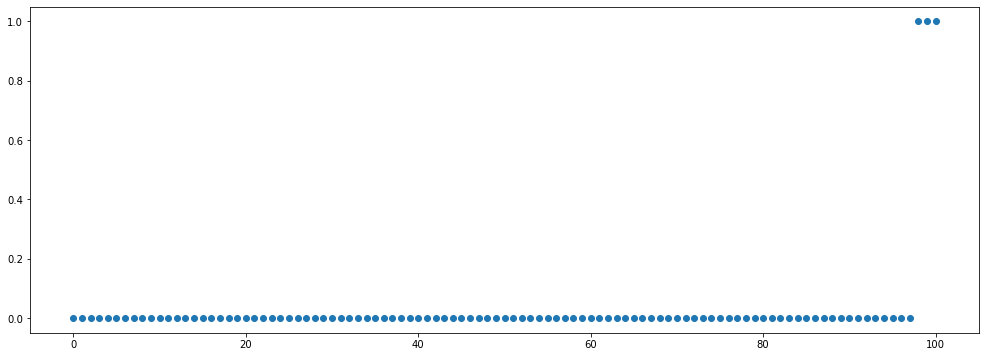

avg_training_score
[39.   44.   45.   46.   46.   47.   47.   47.   48.   48.   48.   48.
 48.   49.   49.   49.   49.   50.   50.   50.   50.   50.   51.   51.
 51.   51.   51.   52.   52.   52.   53.   53.   54.   54.   55.   55.
 56.   56.   57.   57.   58.   58.   58.   58.   59.   59.   59.   59.
 60.   60.   60.   60.   61.   61.   61.   62.   62.   62.   63.   63.
 64.   65.   66.   67.   68.   68.   69.   69.   70.   70.   71.   72.
 72.   73.   74.   76.   77.   78.   78.   79.   79.   80.   80.   80.81
 81.   81.   82.   82.   82.   83.   83.   84.   84.   85.   85.   86.
 86.   87.   88.   91.   99.  ]


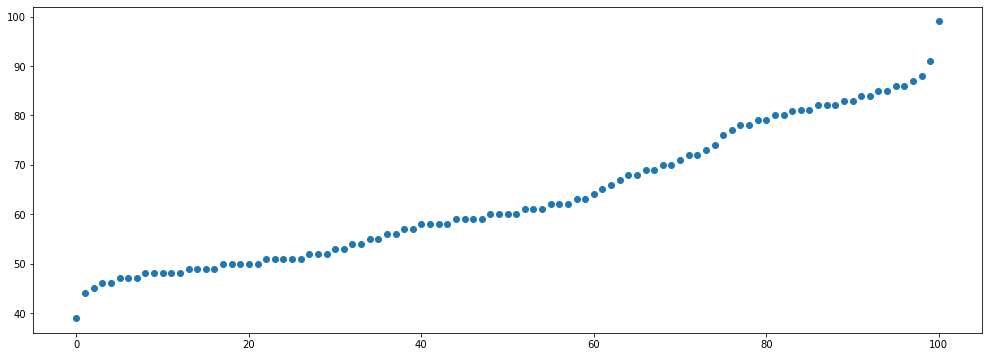

is_promoted
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


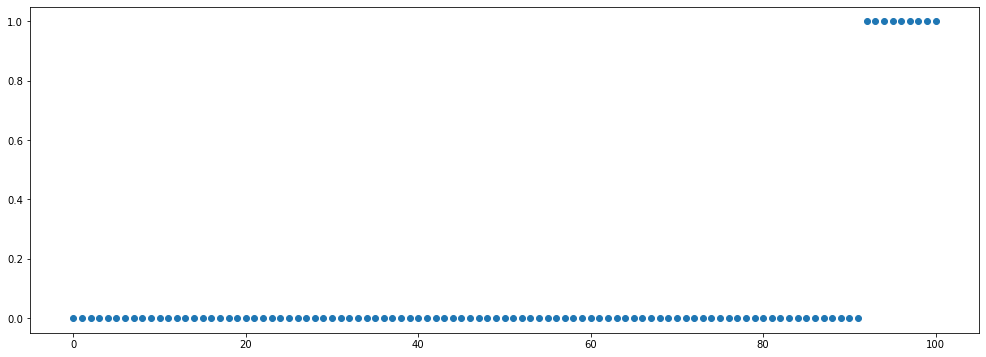

In [60]:
def detect_outlier(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            print(i)
            plt.figure(figsize=(17,6))
            plt.scatter(y=np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)),x = np.arange(0,101,1))
            print(np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)))
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            print(i)
            plt.figure(figsize=(17,6))
            plt.scatter(y=np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)),x = np.arange(0,101,1))
            print(np.quantile(frame[i], q=np.arange(0, 1.01, 0.01)))
            plt.show()
            
detect_outlier(train)

In [44]:
train['no_of_trainings'].where(~(train.no_of_trainings == 10), 4)
train['length_of_service'].where(~(train.length_of_service == 37), 21)
train['avg_training_score'].where(~(train.avg_training_score == 99), 92)

0        49
1        60
2        50
3        50
4        73
         ..
54803    78
54804    56
54805    79
54806    45
54807    49
Name: avg_training_score, Length: 54808, dtype: int64

# Univariant Analysis

department


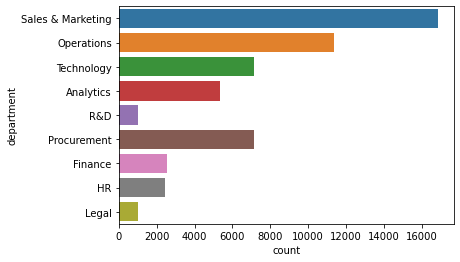

region


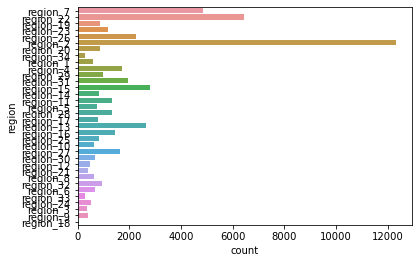

education


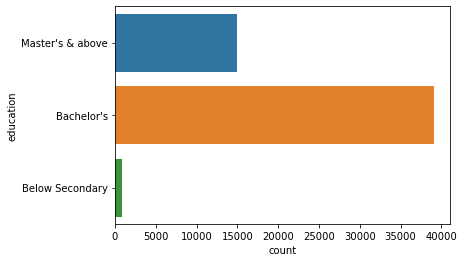

gender


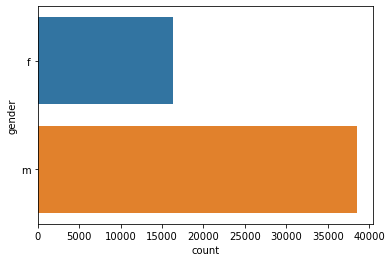

recruitment_channel


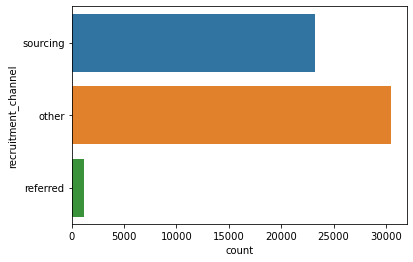

no_of_trainings


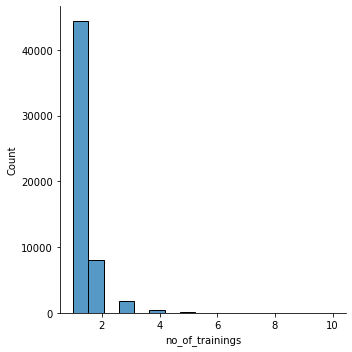

age


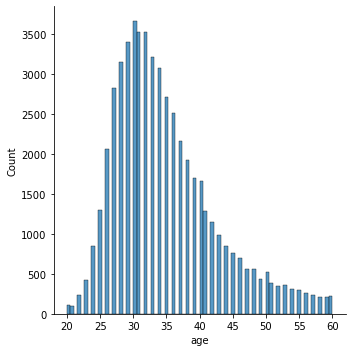

previous_year_rating


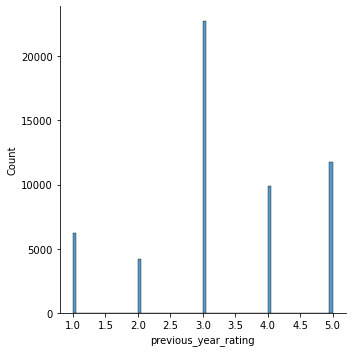

length_of_service


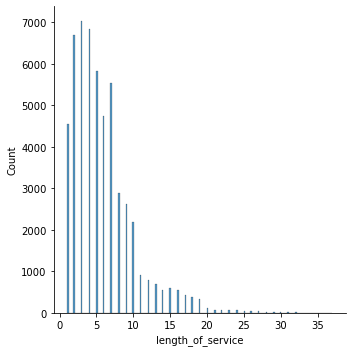

KPIs_met >80%


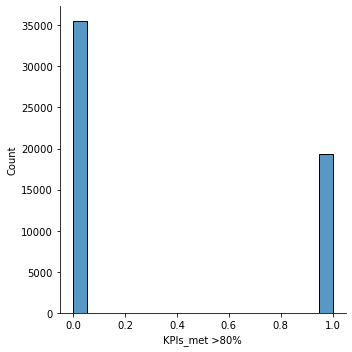

awards_won?


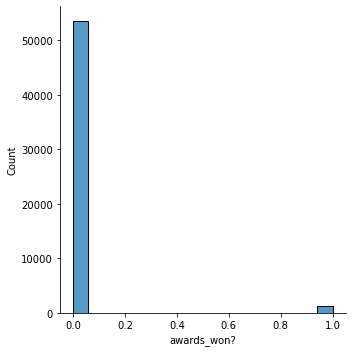

avg_training_score


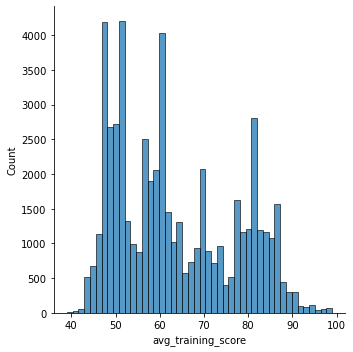

is_promoted


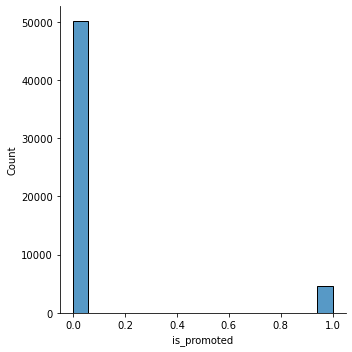

In [9]:
def univariant(frame):
    for i in frame.columns:
        if(frame[i].dtype == 'int64'):
            print(i)
            sns.displot(x=frame[i])
            plt.show()
                
        elif(frame[i].dtype == 'float64'):
            print(i)
            sns.displot(x=frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'O'):
            print(i)
            sns.countplot(y=frame[i])
            plt.show()
            
univariant(train)

# Distribution of target variable

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_promoted', ylabel='count'>

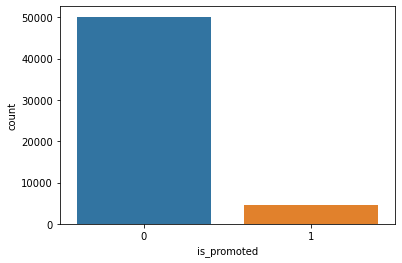

In [20]:
sns.countplot(train['is_promoted'])

# BiVariant Analysis

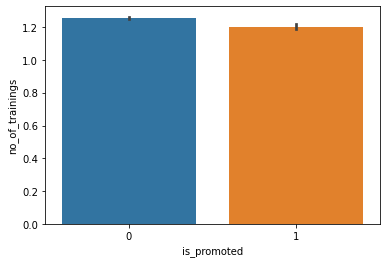

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


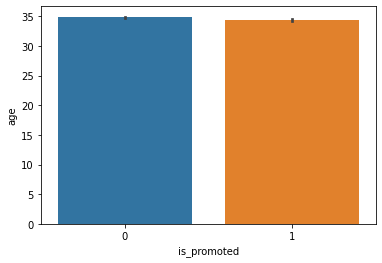

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


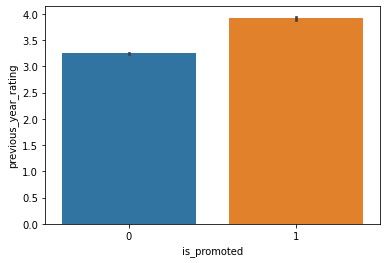

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


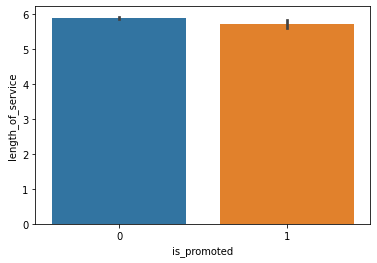

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


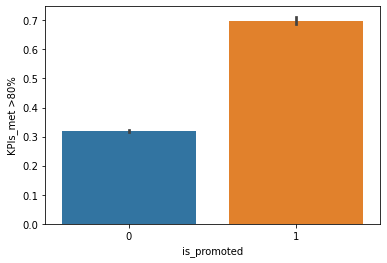

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


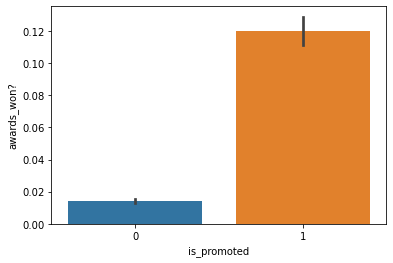

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


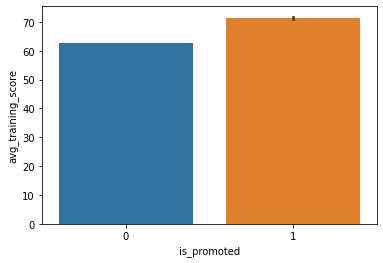

C:\Users\sahil mathur\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


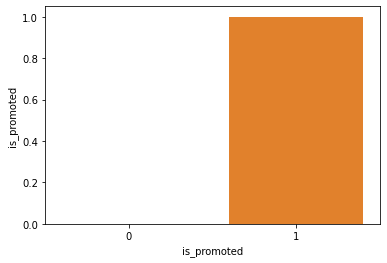

In [112]:
def target(frame):
    for i in frame.columns:
        if()
        elif(frame[i].dtype == 'int64'):
            sns.barplot(train['is_promoted'], frame[i])
            plt.show()
            
        elif(frame[i].dtype == 'float64'):
            sns.barplot(train['is_promoted'], frame[i])
            plt.show()
            
target(train)

# Correlation Map

# Encode Categorical Columns

In [45]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Splitting Data into train and test

In [46]:
x = train.drop('is_promoted', axis=1)
y = train['is_promoted']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [47]:
train['is_promoted'].unique()

array([0, 1], dtype=int64)

# Create Baseline Models

# 1. Logistic Regression

In [48]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [49]:
logistic_pred = logistic.predict(X_test)
print(classification_report(Y_test, logistic_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15058
           1       0.85      0.24      0.38      1385

    accuracy                           0.93     16443
   macro avg       0.89      0.62      0.67     16443
weighted avg       0.93      0.93      0.92     16443



In [50]:
f1_score(Y_test, logistic_pred)

0.3782267115600449

# 2. XGBoost Classifier

In [51]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:36:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
xgb_pred = xgb.predict(X_test)
print(classification_report(Y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     15058
           1       0.90      0.38      0.53      1385

    accuracy                           0.94     16443
   macro avg       0.92      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443



In [53]:
f1_score(Y_test, xgb_pred)

0.5292620865139949

In [54]:
xgb_pred = xgb.predict_proba(X_test)
proba = []
for prob in xgb_pred:
    if(prob[0] > 0.68):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(Y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     15058
           1       0.70      0.43      0.53      1385

    accuracy                           0.94     16443
   macro avg       0.82      0.71      0.75     16443
weighted avg       0.93      0.94      0.93     16443



In [55]:
f1_score(Y_test, proba)

0.5310129406514947

# 3. Random Forest Classifier

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
rf_pred = rf.predict_proba(X_test)
proba = []
for prob in rf_pred:
    if(prob[0] > 0.65):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(Y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     15058
           1       0.55      0.45      0.49      1385

    accuracy                           0.92     16443
   macro avg       0.75      0.71      0.73     16443
weighted avg       0.92      0.92      0.92     16443



In [58]:
f1_score(Y_test, proba)

0.49305279872965463

# 5. KNN

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [62]:
knn_pred = knn.predict(X_test)
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15058
           1       0.70      0.14      0.23      1385

    accuracy                           0.92     16443
   macro avg       0.81      0.57      0.60     16443
weighted avg       0.91      0.92      0.90     16443



In [63]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

GradientBoostingClassifier()

In [64]:
gb_pred = gb.predict_proba(X_test)
proba = []
for prob in gb_pred:
    if(prob[0] > 0.65):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(Y_test, proba))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15058
           1       0.87      0.35      0.50      1385

    accuracy                           0.94     16443
   macro avg       0.91      0.67      0.73     16443
weighted avg       0.94      0.94      0.93     16443



In [65]:
f1_score(Y_test, proba)

NameError: name 'f1_score_score' is not defined

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex = ExtraTreesClassifier()
ex.fit(X_train, Y_train)

In [ ]:
ex_pred = ex.predict_proba(X_test)
proba = []
for prob in ex_pred:
    if(prob[0] > 0.65):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(Y_test, proba))

In [ ]:
f1_score(Y_test, proba)

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(new_X_train, new_Y_train)

In [ ]:
lgbm_pred = lgbm.predict_proba(new_X_test)
proba = []
for prob in lgbm_pred:
    if(prob[0] > 0.65):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(new_Y_test, proba))

In [ ]:
f1_score(new_Y_test, proba)

# 6. Stacking Classifier

In [ ]:
estimators = [
    ('logistic', LogisticRegression(max_iter=10000)),
    ('xgb' , XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('lgbm', LGBMClassifier())
]

stack = StackingClassifier(estimators=estimators, final_estimator=logistic)
stack.fit(new_X_train, new_Y_train)

In [ ]:
stack_pred = stack.predict(new_X_test)
print(classification_report(new_Y_test, stack_pred))

In [ ]:
stack_pred = stack.predict_proba(new_X_test)
proba = []
for prob in stack_pred:
    if(prob[0] > 0.68):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(new_Y_test, proba))

In [ ]:
f1_score(new_Y_test, proba)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
new_X_train, new_Y_train = ros.fit_resample(new_X_train, new_Y_train)

In [ ]:
voting = VotingClassifier(estimators=[
    ('xgb' , XGBClassifier()),
    ('lgbm', LGBMClassifier()),
    ('cat', CatBoostClassifier())
    ], voting='soft', weights=[5,5.2,5])

voting.fit(new_X_train, new_Y_train)

In [ ]:
voting_pred = voting.predict_proba(new_X_test)
proba = []
for prob in voting_pred:
    if(prob[0] > 0.65):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(new_Y_test, proba))

In [ ]:
f1_score(new_Y_test, proba)

# Feature Selection

In [88]:
th = np.sort(xgb.feature_importances_)
l = []
for g in th:
    select = SelectFromModel(xgb, threshold = g, prefit = True)
    x_train = select.transform(X_train)
    model = XGBClassifier()
    model.fit(x_train, Y_train)
    x_test = select.transform(X_test)
    y_pred = model.predict_proba(x_test)
    proba = []
    for prob in y_pred:
        if(prob[0] > 0.68):
            proba.append(0)
        else:
            proba.append(1)
    y_pred = proba
    accuracy = f1_score(Y_test, proba)
    print('Threshold:', g, 'Model Score:', accuracy)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.006297334 Model Score: 0.5310129406514947


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.0069658877 Model Score: 0.5235137533274179


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.0073399288 Model Score: 0.5317247542448615
[17:36:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Threshold: 0.008097696 Model Score: 0.5356489945155393


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.008105863 Model Score: 0.5287356321839081
[17:36:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Threshold: 0.008706556 Model Score: 0.5358986391365556
[17:36:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Threshold: 0.008964102 Model Score: 0.5376647834274952


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:37] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.009339529 Model Score: 0.5359848484848484


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.009380567 Model Score: 0.5364020666979803


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:36:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.00989813 Model Score: 0.5297820823244552
[17:36:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.011001261 Model Score: 0.5359413202933985
[17:36:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.012670276 Model Score: 0.5339189848706687
[17:36:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.013076003 Model Score: 0.5329428989751097
[17:36:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Threshold: 0.017660193 Model Score: 0.5330720235178833


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:37:01] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold: 0.028905485 Model Score: 0.5348950707662274
[17:37:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.031083642 Model Score: 0.5349633251833741
[17:37:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.035252467 Model Score: 0.5237623762376238
[17:37:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.038296886 Model Score: 0.5058939096267191
[17:37:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.04399405 Model Score: 0.19387755102040816
[17:37:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.06911121 Model Score: 0.19387755102040816
[17:37:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.07516895 Model Score: 0.0
[17:37:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.089675136 Model Score: 0.0
[17:37:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.10859401 Model Score: 0.0
[17:37:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.12167438 Model Score: 0.0
[17:37:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Threshold: 0.22074045 Model Score: 0.0


Feature Seletion gives best f1 score of 0.5248301097752223 at 0.055724535 threshold

In [216]:
imp = pd.DataFrame(xgb.feature_importances_)
imp.index = X_train.columns
f_imp = imp[imp[0] < 0.008964102]
f_imp

,0
age,0.007340
length_of_service,0.008106
education_Below Secondary,0.006297
recruitment_channel_referred,0.008707
recruitment_channel_sourcing,0.008098
previous_year_rating_Fresher,0.006966


In [155]:
# creating copy of train and test dataframes for feature selection
new_df = train.copy()
new_test = test.copy()
# Dropping columns
new_df = new_df.drop(['age','length_of_service','education_Below Secondary', 'recruitment_channel_referred', 'recruitment_channel_sourcing', 'previous_year_rating_Fresher'], axis=1)
new_test = new_test.drop(['age','length_of_service','education_Below Secondary', 'recruitment_channel_referred', 'recruitment_channel_sourcing', 'previous_year_rating_Fresher'], axis=1)

In [156]:
new_x = new_df.drop('is_promoted', axis=1)
new_y = new_df['is_promoted']

new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=1)

In [219]:
fxgb = XGBClassifier()
fxgb.fit(new_X_train, new_Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [220]:
fxgb_pred = fxgb.predict_proba(new_X_test)
proba = []
for prob in fxgb_pred:
    if(prob[0] > 0.68):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(new_Y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15058
           1       0.77      0.41      0.54      1385

    accuracy                           0.94     16443
   macro avg       0.86      0.70      0.75     16443
weighted avg       0.93      0.94      0.93     16443



In [221]:
f1_score(Y_test, proba)

0.5376647834274952

# Hyper Parameter Tuning

In [167]:
np.arange(0.1, 0.3, 0.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29])

In [168]:
max_bin = [i for i in range(40, 140, 10)],
learning_rate = [l for l in np.arange(0.1,0.3,0.01)],
num_leaves = [a for a in range(10, 100, 5)],
boosting_type = ['dart']
n_estimators = [n for n in range(100, 500, 50)],

hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate' : learning_rate,
    'max_bin' : max_bin,
    'num_iteration' : num_iteration,
    'num_leaves' : num_leaves,
    'boosting_type' : boosting_type
}

In [169]:
random_cv = RandomizedSearchCV(estimator = lgbm,
                              param_distributions = hyperparameter_grid,
                              cv=5,
                              n_iter=30, 
                              scoring='accuracy',
                              n_jobs=4,
                              verbose=7,
                              return_train_score=True,
                              random_state=10)

random_cv.fit(new_X_train, new_Y_train)

C:\Users\sahil mathur\anaconda\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 8 is smaller than n_iter=30. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished
C:\Users\sahil mathur\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


TypeError: '<=' not supported between instances of 'list' and 'int'

In [263]:
random_cv.best_estimator_

XGBClassifier(base_score=0.63, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.051000000000000004, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [264]:
axgb = XGBClassifier(base_score=0.63, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.051000000000000004, max_delta_step=0, max_depth=3,
              min_child_weight=4, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
axgb.fit(X_train, Y_train)

[20:21:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.63, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.051000000000000004, max_delta_step=0, max_depth=3,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [265]:
axgb_pred = axgb.predict(X_test)
print(classification_report(Y_test, axgb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15058
           1       0.95      0.35      0.51      1385

    accuracy                           0.94     16443
   macro avg       0.94      0.68      0.74     16443
weighted avg       0.94      0.94      0.93     16443



In [266]:
axgb_pred = axgb.predict_proba(X_test)
proba = []
for prob in axgb_pred:
    if(prob[0] > 0.68):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(Y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15058
           1       0.82      0.39      0.53      1385

    accuracy                           0.94     16443
   macro avg       0.88      0.69      0.75     16443
weighted avg       0.94      0.94      0.93     16443



In [267]:
f1_score(Y_test, proba)

0.5311890838206628

# Creating Submission File

In [173]:
probab = lgbm.predict_proba(new_test)
proba = []
for prob in probab:
    if(prob[0] > 0.68):
        proba.append(0)
    else:
        proba.append(1)

In [174]:
submit = pd.DataFrame({
    'employee_id' : sample_sub['employee_id'],
    'is_promoted' : proba
})
submit.to_csv('Submition.csv', index=False)

In [150]:
test.drop('is_promoted', axis=1, inplace=True)

# Best Model

My best model is XGBoost Classifierr after feature selection

In [68]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, Y_train)

Learning rate set to 0.048896
0:	learn: 0.6400957	total: 340ms	remaining: 5m 40s
1:	learn: 0.5897662	total: 365ms	remaining: 3m 2s
2:	learn: 0.5331691	total: 416ms	remaining: 2m 18s
3:	learn: 0.4865856	total: 456ms	remaining: 1m 53s
4:	learn: 0.4549633	total: 493ms	remaining: 1m 38s
5:	learn: 0.4280954	total: 524ms	remaining: 1m 26s
6:	learn: 0.4040471	total: 559ms	remaining: 1m 19s
7:	learn: 0.3808888	total: 588ms	remaining: 1m 12s
8:	learn: 0.3637702	total: 612ms	remaining: 1m 7s
9:	learn: 0.3495308	total: 634ms	remaining: 1m 2s
10:	learn: 0.3376175	total: 657ms	remaining: 59s
11:	learn: 0.3247379	total: 679ms	remaining: 55.9s
12:	learn: 0.3123908	total: 701ms	remaining: 53.2s
13:	learn: 0.3044363	total: 721ms	remaining: 50.7s
14:	learn: 0.2880256	total: 751ms	remaining: 49.3s
15:	learn: 0.2817730	total: 775ms	remaining: 47.6s
16:	learn: 0.2708059	total: 798ms	remaining: 46.1s
17:	learn: 0.2645759	total: 820ms	remaining: 44.7s
18:	learn: 0.2548568	total: 842ms	remaining: 43.5s
19:	le

163:	learn: 0.1631029	total: 4.96s	remaining: 25.3s
164:	learn: 0.1630508	total: 4.99s	remaining: 25.3s
165:	learn: 0.1629595	total: 5.02s	remaining: 25.2s
166:	learn: 0.1628970	total: 5.05s	remaining: 25.2s
167:	learn: 0.1628468	total: 5.08s	remaining: 25.2s
168:	learn: 0.1627990	total: 5.12s	remaining: 25.2s
169:	learn: 0.1627186	total: 5.15s	remaining: 25.2s
170:	learn: 0.1626657	total: 5.18s	remaining: 25.1s
171:	learn: 0.1626326	total: 5.22s	remaining: 25.1s
172:	learn: 0.1625847	total: 5.24s	remaining: 25.1s
173:	learn: 0.1625540	total: 5.26s	remaining: 25s
174:	learn: 0.1625118	total: 5.29s	remaining: 24.9s
175:	learn: 0.1624984	total: 5.31s	remaining: 24.9s
176:	learn: 0.1624505	total: 5.34s	remaining: 24.8s
177:	learn: 0.1623959	total: 5.36s	remaining: 24.8s
178:	learn: 0.1623328	total: 5.38s	remaining: 24.7s
179:	learn: 0.1622895	total: 5.41s	remaining: 24.6s
180:	learn: 0.1622279	total: 5.43s	remaining: 24.6s
181:	learn: 0.1621433	total: 5.45s	remaining: 24.5s
182:	learn: 0.

326:	learn: 0.1543075	total: 9.14s	remaining: 18.8s
327:	learn: 0.1542773	total: 9.17s	remaining: 18.8s
328:	learn: 0.1542462	total: 9.19s	remaining: 18.7s
329:	learn: 0.1542105	total: 9.21s	remaining: 18.7s
330:	learn: 0.1541867	total: 9.23s	remaining: 18.7s
331:	learn: 0.1541099	total: 9.26s	remaining: 18.6s
332:	learn: 0.1540780	total: 9.28s	remaining: 18.6s
333:	learn: 0.1540376	total: 9.3s	remaining: 18.5s
334:	learn: 0.1539914	total: 9.33s	remaining: 18.5s
335:	learn: 0.1539565	total: 9.35s	remaining: 18.5s
336:	learn: 0.1539225	total: 9.37s	remaining: 18.4s
337:	learn: 0.1538921	total: 9.4s	remaining: 18.4s
338:	learn: 0.1538539	total: 9.42s	remaining: 18.4s
339:	learn: 0.1538380	total: 9.44s	remaining: 18.3s
340:	learn: 0.1537779	total: 9.46s	remaining: 18.3s
341:	learn: 0.1537460	total: 9.49s	remaining: 18.3s
342:	learn: 0.1537242	total: 9.51s	remaining: 18.2s
343:	learn: 0.1536798	total: 9.54s	remaining: 18.2s
344:	learn: 0.1535962	total: 9.56s	remaining: 18.2s
345:	learn: 0.

487:	learn: 0.1485325	total: 13.2s	remaining: 13.9s
488:	learn: 0.1484973	total: 13.2s	remaining: 13.8s
489:	learn: 0.1484644	total: 13.3s	remaining: 13.8s
490:	learn: 0.1484093	total: 13.3s	remaining: 13.8s
491:	learn: 0.1483994	total: 13.3s	remaining: 13.8s
492:	learn: 0.1483741	total: 13.4s	remaining: 13.7s
493:	learn: 0.1483203	total: 13.4s	remaining: 13.7s
494:	learn: 0.1482789	total: 13.4s	remaining: 13.7s
495:	learn: 0.1482556	total: 13.4s	remaining: 13.7s
496:	learn: 0.1482327	total: 13.5s	remaining: 13.6s
497:	learn: 0.1482167	total: 13.5s	remaining: 13.6s
498:	learn: 0.1481877	total: 13.5s	remaining: 13.6s
499:	learn: 0.1481634	total: 13.5s	remaining: 13.5s
500:	learn: 0.1481388	total: 13.6s	remaining: 13.5s
501:	learn: 0.1481245	total: 13.6s	remaining: 13.5s
502:	learn: 0.1481050	total: 13.6s	remaining: 13.5s
503:	learn: 0.1480767	total: 13.7s	remaining: 13.4s
504:	learn: 0.1480364	total: 13.7s	remaining: 13.4s
505:	learn: 0.1480002	total: 13.7s	remaining: 13.4s
506:	learn: 

650:	learn: 0.1440054	total: 17.4s	remaining: 9.31s
651:	learn: 0.1439813	total: 17.4s	remaining: 9.29s
652:	learn: 0.1439670	total: 17.5s	remaining: 9.28s
653:	learn: 0.1439576	total: 17.5s	remaining: 9.25s
654:	learn: 0.1439395	total: 17.5s	remaining: 9.22s
655:	learn: 0.1439247	total: 17.5s	remaining: 9.2s
656:	learn: 0.1439141	total: 17.6s	remaining: 9.17s
657:	learn: 0.1438967	total: 17.6s	remaining: 9.14s
658:	learn: 0.1438868	total: 17.6s	remaining: 9.11s
659:	learn: 0.1438594	total: 17.6s	remaining: 9.09s
660:	learn: 0.1438385	total: 17.7s	remaining: 9.06s
661:	learn: 0.1438133	total: 17.7s	remaining: 9.03s
662:	learn: 0.1437976	total: 17.7s	remaining: 9s
663:	learn: 0.1437645	total: 17.7s	remaining: 8.97s
664:	learn: 0.1437554	total: 17.8s	remaining: 8.94s
665:	learn: 0.1437298	total: 17.8s	remaining: 8.91s
666:	learn: 0.1436849	total: 17.8s	remaining: 8.88s
667:	learn: 0.1436678	total: 17.8s	remaining: 8.86s
668:	learn: 0.1436499	total: 17.8s	remaining: 8.83s
669:	learn: 0.14

812:	learn: 0.1399683	total: 21.6s	remaining: 4.98s
813:	learn: 0.1399401	total: 21.7s	remaining: 4.95s
814:	learn: 0.1399250	total: 21.7s	remaining: 4.92s
815:	learn: 0.1399095	total: 21.7s	remaining: 4.9s
816:	learn: 0.1398909	total: 21.7s	remaining: 4.87s
817:	learn: 0.1398606	total: 21.8s	remaining: 4.84s
818:	learn: 0.1398547	total: 21.8s	remaining: 4.81s
819:	learn: 0.1398222	total: 21.8s	remaining: 4.79s
820:	learn: 0.1398109	total: 21.8s	remaining: 4.76s
821:	learn: 0.1397925	total: 21.9s	remaining: 4.73s
822:	learn: 0.1397331	total: 21.9s	remaining: 4.71s
823:	learn: 0.1397040	total: 21.9s	remaining: 4.68s
824:	learn: 0.1396859	total: 21.9s	remaining: 4.65s
825:	learn: 0.1396382	total: 22s	remaining: 4.62s
826:	learn: 0.1396006	total: 22s	remaining: 4.6s
827:	learn: 0.1395527	total: 22s	remaining: 4.57s
828:	learn: 0.1395320	total: 22s	remaining: 4.54s
829:	learn: 0.1394900	total: 22.1s	remaining: 4.52s
830:	learn: 0.1394583	total: 22.1s	remaining: 4.49s
831:	learn: 0.1394301	

973:	learn: 0.1363060	total: 26s	remaining: 694ms
974:	learn: 0.1362868	total: 26s	remaining: 667ms
975:	learn: 0.1362739	total: 26s	remaining: 640ms
976:	learn: 0.1362447	total: 26.1s	remaining: 614ms
977:	learn: 0.1362263	total: 26.1s	remaining: 587ms
978:	learn: 0.1361927	total: 26.1s	remaining: 561ms
979:	learn: 0.1361728	total: 26.2s	remaining: 534ms
980:	learn: 0.1361531	total: 26.2s	remaining: 508ms
981:	learn: 0.1361320	total: 26.3s	remaining: 481ms
982:	learn: 0.1361135	total: 26.3s	remaining: 455ms
983:	learn: 0.1360944	total: 26.3s	remaining: 428ms
984:	learn: 0.1360837	total: 26.3s	remaining: 401ms
985:	learn: 0.1360564	total: 26.4s	remaining: 374ms
986:	learn: 0.1360343	total: 26.4s	remaining: 348ms
987:	learn: 0.1360103	total: 26.4s	remaining: 321ms
988:	learn: 0.1359845	total: 26.4s	remaining: 294ms
989:	learn: 0.1359671	total: 26.5s	remaining: 267ms
990:	learn: 0.1359535	total: 26.5s	remaining: 240ms
991:	learn: 0.1359293	total: 26.5s	remaining: 214ms
992:	learn: 0.1358

In [69]:
cat_pred = cat.predict_proba(X_test)
proba = []
for prob in cat_pred:
    if(prob[0] > 0.68):
        proba.append(0)
    else:
        proba.append(1)
print(classification_report(Y_test, proba))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     15058
           1       0.76      0.41      0.53      1385

    accuracy                           0.94     16443
   macro avg       0.85      0.70      0.75     16443
weighted avg       0.93      0.94      0.93     16443



In [70]:
f1_score(Y_test, proba)

0.5328330206378987